In [1]:
%matplotlib inline
import pyximport

import warnings
warnings.filterwarnings('ignore')
from importlib import reload

import sys
import os
sys.path.insert(0,os.path.join(os.getcwd(),os.pardir))
from qutip import *
import numpy as np
pyximport.install(setup_args={"include_dirs":np.get_include()})
import matplotlib.pyplot as plt
import LH_tools as LHT
import dorit.XXZZham as XXZZham
from dorit.XXZZham import add_high_energies, rotate_to_00_base
import random
import adiabatic_sim as asim
from IPython.display import display,Math,Latex
import scipy
import Code_hams as CH

Start with the uniform-perp projection
and adiabaticly evolve to our code

In [2]:
n, m = 5,8
# generate the uniform-perp projector
zero_m = LHT.create_vector_from_string("0" * m )
uniform_m = hadamard_transform(m) * zero_m
H0_U = LHT.proj_orth(uniform_m)
# generate our code
Hcode,code,min_weight = CH.generate_random_code_hamiltonian(n, m)
Hnoise,min_weight_noised = CH.generate_noised_hamiltonian(code,np.sqrt(m))

 There are four hamiltonians 
 $$H0_{\sum-}= \sum_{i=0}^{i=m}\left|-\right>_i\left<-\right|_i$$
 $$H0_{U}= I-\left|\phi\right>\left<\phi\right|  \ \ where \  \left|\phi\right> = \frac{1}{2^m}\sum_{comp\ basis} \left|i\right>$$ 
 $$H_{code}$$
 and 
 $$H_{noise}$$

 we wish to examine the gaps and processes between the two former and two latter

In [16]:
# Generate H0 as sigma |->_i 
terms = []
plus = (basis(2,0)+basis(2,1))/2**(1/2)
minus = (basis(2,0)-basis(2,1))/2**(1/2)
proj_minus = LHT.proj_on(minus)
#probably faster to use LHT.LocalOperator({i:sigmaz() * hadamard_transform(1)}) for each i , but thats still fast enough
for i in range(1,m+1):
    terms.append(LHT.LocalOperator({i:proj_minus}).full_form(m))
H0_sum_minus = sum(terms)


In [4]:

display(Math("From\ H0_{U}\ to "))
display(Math("H_{code}:"))
print("gap %f at s=%f" % asim.find_min_gap(H0_U, Hcode,initial_resolution=4))
display(Math("H_{noise}:"))
print("gap %f at s=%f" % asim.find_min_gap(H0_U, Hnoise,initial_resolution=4))

display(Math("From\ H0_{\sum}\ to "))
display(Math("H_{code}:"))
print("gap %f at s=%f" % asim.find_min_gap(H0_sum_minus, Hcode, initial_resolution=4))
display(Math("H_{noise}:"))
print("gap %f at s=%f" % asim.find_min_gap(H0_sum_minus, Hnoise,initial_resolution=4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

gap 0.000000 at s=1.000000


<IPython.core.display.Math object>

gap 0.017950 at s=0.529501


<IPython.core.display.Math object>

<IPython.core.display.Math object>

gap 0.000000 at s=1.000000


<IPython.core.display.Math object>

gap 0.002823 at s=0.865659


## Minimal adiabatic time

In [ ]:
mingap_U_noise = asim.find_global_adiabatic_rate( H0_U, Hnoise, 2500,adiabatic_steps=2000)

In [ ]:
mingap_sum_noise = asim.find_global_adiabatic_rate( H0_sum_minus, Hnoise, 2500,adiabatic_steps=2000)

In [ ]:
mingap_U_code =asim.find_global_adiabatic_rate( H0_U, Hcode, 2500,adiabatic_steps=2000)

In [ ]:
mingap_sum_code =asim.find_global_adiabatic_rate( H0_sum_minus, Hcode, 2500,adiabatic_steps=2000)

In [50]:
print(mingap_U_code, mingap_U_noise , mingap_sum_code, mingap_sum_noise)

1679.6875 1367.1875 937.5 2500.0


## simulations

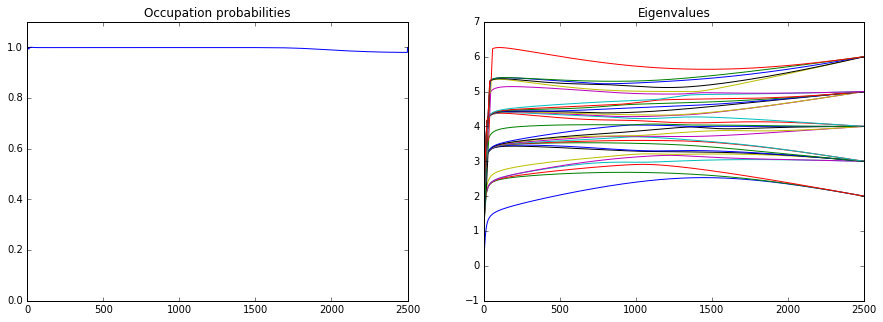

[array([ 0.99837973])]

In [40]:

tlist = np.linspace(0,2500,2000)
psi_plus = hadamard_transform(m) * zero_m
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0_sum_minus, Hcode,uniform_m,max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()
P_mat[-1]

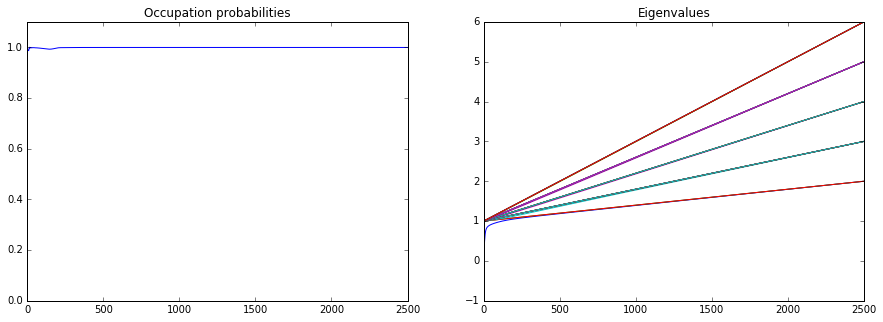

[array([ 0.99883306])]

In [39]:

tlist = np.linspace(0,2500,2000)
psi_plus = hadamard_transform(m) * zero_m
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0_U, Hcode,uniform_m,max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()
P_mat[-1]

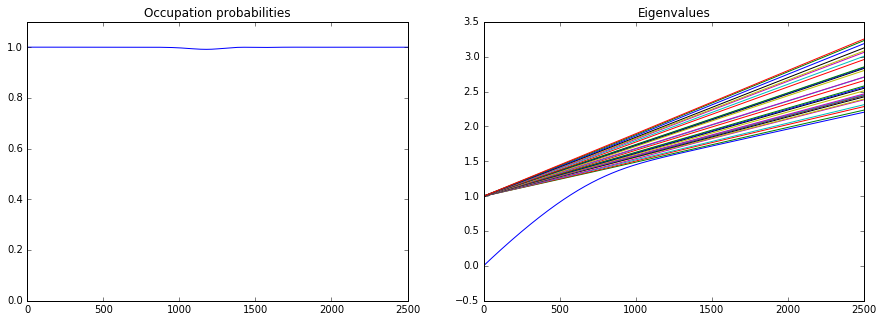

[array([ 0.9997946])]

In [23]:
tlist = np.linspace(0,2500,2000)
psi_plus = hadamard_transform(m) * zero_m
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0_U, Hnoise,uniform_m,max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()
P_mat[-1]

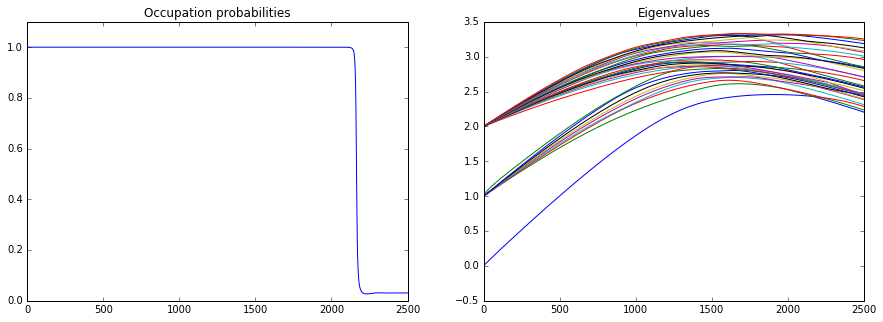

[array([ 0.03091084])]

In [24]:
tlist = np.linspace(0,2500,2000)
psi_plus = hadamard_transform(m) * zero_m
P_mat, eigvals_mat, psis= asim.sim_degenerate_adiabatic(tlist, H0_sum_minus, Hnoise,tensor([plus]*m),max_degen=2**n-1)
LHT.plot_PandEV(P_mat, eigvals_mat, tlist)
plt.show()
P_mat[-1]

## Gaps

In [26]:
asim.find_min_gap(H0_U,Hnoise,initial_resolution=10)

(0.017950387199365814, 0.5295343922959994)

In [38]:
asim.find_min_gap(H0_sum_minus,Hnoise,initial_resolution=10)

(0.0028229483626853735, 0.8656505788644708)

In [51]:
Hnoise

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2]], shape = [256, 256], type = oper, isherm = True
Qobj data =
[[ 256.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            5.10916854    0.         ...,    0.            0.            0.        ]
 [   0.            0.            4.50733274 ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,    7.00316898    0.            0.        ]
 [   0.            0.            0.         ...,    0.            3.76692547
     0.        ]
 [   0.            0.            0.         ...,    0.            0.
     4.15734983]]